Enrollment no- 2021MSBDA032 , Assignment no - 4

# Gradient Descent :

In [43]:
# importing the data set :
import pandas as pd
housing=pd.read_csv(r"C:\Users\DELL\Downloads\Housing - Sheet1.csv")
housing

,price,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefera,furnishing status
0,13300000,7420,4,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-farnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
# Converting yes to 1 and no to 0:
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0})
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})
housing['prefera']=housing['prefera'].map({'yes':1,'no':0})

In [45]:
# Converting furnishing status column to binary column using get_dummies:
status=pd.get_dummies(housing['furnishing status'],drop_first=True)
housing=pd.concat([housing,status],axis=1)
housing.drop(['furnishing status'],axis=1,inplace=True)

In [46]:
housing

,price,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefera,semi-farnished
0,13300000,7420,4,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,2,1,1,1,0,1,2,0,0


In [47]:
# Normalising the data :
housing=(housing - housing.mean())/housing.std()
housing

,price,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefera,semi-farnished
0,1.511730,-0.718171,0.447214,0.447214,NaN,-0.447214,-1.095445,NaN,0.447214,-0.730297,0.730297,-0.447214
1,-0.052129,0.611136,0.447214,1.565248,NaN,-0.447214,-1.095445,NaN,0.447214,1.095445,-1.095445,-0.447214
2,-0.052129,1.474321,-1.788854,-0.670820,NaN,-0.447214,0.730297,NaN,-1.788854,-0.730297,0.730297,1.788854
3,-0.104257,-0.649116,0.447214,-0.670820,NaN,-0.447214,0.730297,NaN,0.447214,1.095445,0.730297,-0.447214
4,-1.303215,-0.718171,0.447214,-0.670820,NaN,1.788854,0.730297,NaN,0.447214,-0.730297,-1.095445,-0.447214


In [48]:
# Simple linear Regression :
# Assigning the variable x and y :
x=housing['area']
y=housing['price']

In [49]:
# for visualising :
import seaborn as sns
%matplotlib inline

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


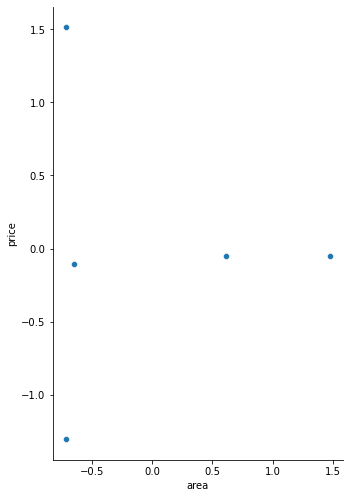

In [50]:
sns.pairplot(housing,x_vars='area',y_vars='price',size=7,aspect=0.7,kind='scatter')

In [51]:
import numpy as np
X=np.array(x)
y=np.array(y)

In [52]:
#implimentatiom of gradient descent function :
def gradient(X,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N=float(len(y))
    gd_df=pd.DataFrame(columns=['m_current','c_current','cost'])
    for i in range(iters):
        y_current=(m_current*X)+c_current
        cost=sum([data**2 for data in (y-y_current)])/N
        m_gradient=-(2/N)*sum(X*(y-y_current))
        c_gradient=-(2/N)*sum(y-y_current)
        m_current=m_current-(learning_rate*m_gradient)
        c_current=c_current-(learning_rate*c_gradient)
        gd_df.loc[i]=[m_current,c_current,cost]
    return(gd_df)
        
        

In [53]:
gradients=gradient(X,y) 
gradients

,m_current,c_current,cost
0,-0.000763,-8.881784e-19,0.800000
1,-0.001514,0.000000e+00,0.799942
2,-0.002253,-8.881784e-19,0.799886
3,-0.002980,-8.881784e-19,0.799832
4,-0.003696,-1.776357e-18,0.799780
...,...,...,...
995,-0.047696,-6.217249e-18,0.798180
996,-0.047696,-6.217249e-18,0.798180
997,-0.047696,-7.105427e-18,0.798180
998,-0.047696,-7.105427e-18,0.798180


<AxesSubplot:xlabel='index'>

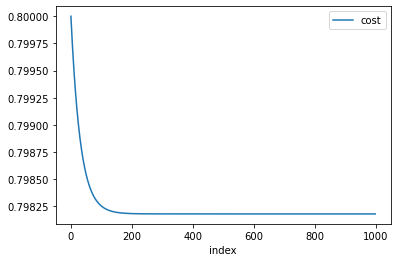

In [54]:
# plotting the cost against num_itteration :
gradients.reset_index().plot.line(x='index',y=['cost'])

So, the final cost is 0.798180 . 

#                           Thank you 

                    _______________________________________________________________________________